# **Introduction**

Welcome to this webinar where we learn how to make use of natural language to query our database. First of all, allow me to introduce to the concept of `Text-SQL`.


## **Text-to-SQL**

The concept of using your native natural language to query a database has become more prominent due to the emergence of Large Language Models (LLMs). 

The task involves converting the text input into a structured representation and then using this representation to generate a semantically correct SQL query that can be executed on a database.


*Insert image of native languae text to database queries.*

Today, you'll find several wrappers around LLMs doing text 2 SQL. LLamaIndex, AWS etc.


---


**Examples of Some NLP queries**:

1. “Show total sales for each product last month”
2. “Which products generated more revenue?”
3. “What percentage of customers are from each region?”



## **Challenges**

1. Human language is inherently ambiguous and context-dependent, whereas SQL is precise, mathematical, and structured. This gap may result in inaccurate conversion of the user’s needs into the SQL that’s generated.
2. You might need to build text-to-SQL features for every database because data is often not stored in a single target. You may have to recreate the capability for every database to enable users with NLP-based SQL generation.
3. Despite the larger adoption of centralized analytics solutions like data lakes and warehouses, complexity rises with different table names and other metadata that is required to create the SQL for the desired sources.



## **Advantages**

1. It gives non technical folks so much power and quicker insights into operational data

## **Components for building a Text to SQL system**

Image of flow:

1. Natural language processing:

>> Analyze the user’s input query

>> Extract key elements and intent

>> Convert to a structured format


2. SQL generation:

>> Map extracted details into SQL syntax

>> Generate a valid SQL query

3. Database query:

>> Run the AI-generated SQL query on the database

>> Retrieve results

>> Return results to the user

AWS architecture

https://d2908q01vomqb2.cloudfront.net/f1f836cb4ea6efb2a0b1b99f41ad8b103eff4b59/2024/02/22/ML-16098-image01-Architecture.png

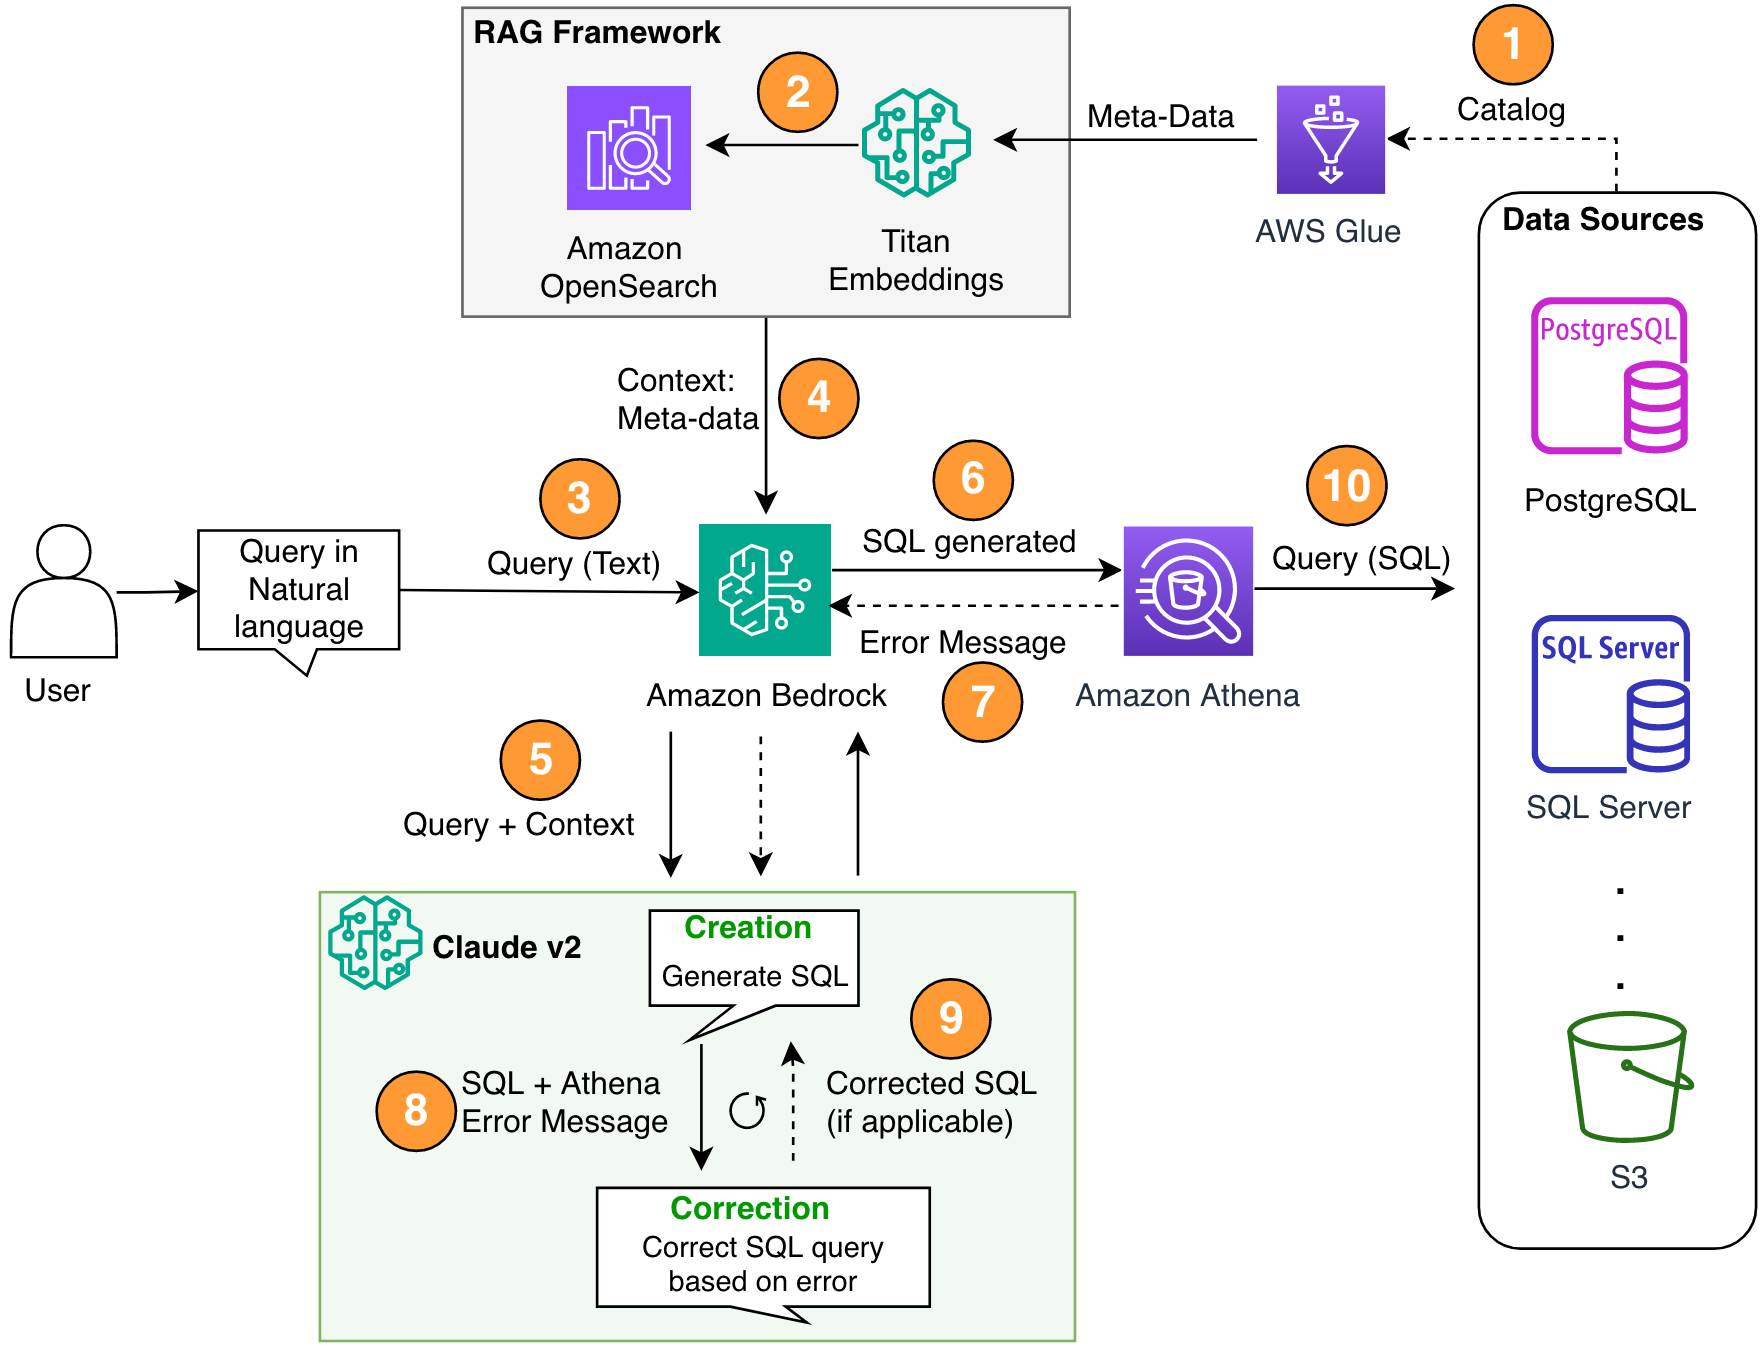

Other Use cases of Text on LLM to Output;

1. Text to Image generation

# Generating SQL for Postgres using OpenAI via Vanna.AI

This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. 

## Steps:

1. Setup of Environment
2. Model Selection / Model API Key
3. Database Selection
4. Database Table setup for training
5. Vector Store DB - to store the training data
6. Training
7. Asking the AI/Querying


## Setup

Login https://vanna.ai/

In [1]:
#using google colab secrets
#from google.colab import userdata
#userdata.get('api_key')

#set the env code on vs code
import os

#accessing the env variables
#api_key = # Your API key from https://vanna.ai/account/profile
api_key = os.getenv('API_KEY')

In [2]:
#google colab
#%pip install 'vanna[postgres]'
#vs code (10mins 14 secs to install)
%pip install vanna


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Model Selection

OpenAI via Vanna.AI

---

Vector DB Store (Where do you want to store the 'training' data?)

I'm using Vanna Hosted Vector DB by default


In [3]:
import vanna
from vanna.remote import VannaDefault

In [4]:
#vanna_model_name = # Your model name from https://vanna.ai/account/profile
#vanna_model_name = 'chinook'
vanna_model_name = "text-sql-test"

#google colab
#vn = VannaDefault(model=vanna_model_name, api_key='input key directly')

#vs code
vn = VannaDefault(model=vanna_model_name, api_key=api_key)

## Which database do you want to query?

Postgres on PgAdmin. The database contains four tables (1 is a repition, so 3 Tables actually). The database contains random fake product and sales in a fake company. 

1. Mailing list
2. Product1
3. Sales

Let's run some queries to see the table in PgAdmin
      

In [5]:
#install psycopg2 library to access your postgres database
%pip install psycopg2-binary


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
#import database dependencies
import psycopg2
import psycopg2.extras

### Checking My Postgres Database Connection

In [9]:
import pandas as pd
import os

#Establish connection to the database
connection = psycopg2.connect(
    dbname='',
    user='',
    password='',
    host='',
    port=''
)


# Execute the query of one table
# query = "SELECT * FROM sales"
# df_information_schema = pd.read_sql_query(query, connection)

#all public tables
query = "SELECT table_name FROM information_schema.tables WHERE table_schema = 'public'"
df_information_schema = pd.read_sql_query(query, connection)

# # Function to query a table and return the result as a DataFrame
def query_table(table_name, connection):
    query_all = f"SELECT * FROM {table_name} LIMIT 10"  # Limiting rows for demonstration
    return pd.read_sql_query(query_all, connection)

# # Step 2: Iterate through the list of tables and query each one
for table_name in df_information_schema['table_name']:
    df = query_table(table_name, connection)
    print(f"Data from table {table_name}:")
    print(df.head())  # Display the first few rows of the DataFrame

connection.close()
# #end of all public tables section

#query two tables
# query = "SELECT * FROM sales; SELECT * FROM products1;"
# df_information_schema = pd.read_sql_query(query, connection)

# Close the connection
connection.close()

# Display the first few rows of the DataFrame
print(df_information_schema.head())

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4964\4128534615.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_information_schema = pd.read_sql_query(query, connection)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4964\4128534615.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query_all, connection)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4964\4128534615.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query_all, connection)
C:\Users\LENOVO\AppData\Local\

Data from table products1:
   id                       product  manufacturing_cost  created_at
0   1              Milk - Condensed              266.83  2019-12-03
1   2   Pasta - Shells, Medium, Dry              841.98  2018-09-16
2   3  Chips Potato Swt Chilli Sour              930.60  2020-07-15
3   4           Bread - Bistro Sour              697.19  2018-05-17
4   5      Wine - Valpolicella Masi              981.62  2020-12-11
Data from table company_mailing_list:
   id first_name   location                     email  created_at
0   1      Juana     Russia                      None  2019-12-09
1   2       Thia     Poland  tberkery1@shutterfly.com  2020-01-23
2   3   Andriana  Indonesia        alidstone2@ucoz.ru  2018-09-22
3   4  Bartolemo     Brazil                      None  2020-07-17
4   5    Karalee      Japan       kmcmakin4@chron.com  2020-01-05
Data from table mailing_list:
   id first_name     location                         email    company  \
0   1        Nat        Chi

In [ ]:
# # Function to query a table and return the result as a DataFrame
# def query_table(table_name, connection):
#     query = f"SELECT * FROM {table_name} LIMIT 10"  # Limiting rows for demonstration
#     return pd.read_sql_query(query, connection)

# # Step 2: Iterate through the list of tables and query each one
# for table_name in df_tables['table_name']:
#     df = query_table(table_name, connection)
#     print(f"Data from table {table_name}:")
#     print(df.head())  # Display the first few rows of the table

### Connecting to Vanna with my Database

In [10]:
vn.connect_to_postgres(host='', dbname='', user='', password='', port='')

## Training
You only need to train once. Do not train again unless you want to add more training data.

 `vn.train` is a wrapper function that allows you to train the system

### How to Train

1. DDL statements:  (These statements give the system an understanding of what tables, columns, and data types are available.) ``vn.train(ddl="CREATE TABLE my_table (id INT, name TEXT)")``

2. Documentation strings: Give the LLM more context about your business or industry category. ``vn.train(documentation="Our business defines XYZ as ABC")``

3. SQL Statements: One of the most helpful things for the system to understand is the SQL queries that are commonly used in your organization. This will help the system understand the context of the questions that are being asked.
``vn.train(sql="SELECT col1, col2, col3 FROM my_table")``

4. Question-SQL Pairs: You can also train the system with question-SQL pairs. This is the most direct way to train the system and is the most helpful for the system to understand the context of the questions that are being asked. This is especially true when your users tend to ask questions that have a lot of ambiguity.

``vn.train(
    question="What is the average age of our customers?", 
    sql="SELECT AVG(age) FROM customers"
)`` 


Note:

`SELECT * FROM my_table` is a BAD example of a SQL statement to train the system with. It's too generic and doesn't provide enough context for the system to understand the structure of the table. If you use a SQL statement to train, it's best to use statements that use column names. For example, `SELECT id, name, email FROM my_table` is a better example of a SQL statement to train the system with.

## Training Plan

A training plan is basically just your database information schema broken up into bite-sized chunks that can be referenced by the LLM. This is a good way to train the system with a lot of data quickly.

In [11]:

# The information schema query may need some tweaking depending on your database. This is a good starting point.
df_information_schema = vn.run_sql("SELECT * FROM INFORMATION_SCHEMA.COLUMNS")
#df_information_schema = vn.run_sql("SELECT id, product, manufacturing_cost, created_at FROM products1")

# This will break up the information schema into bite-sized chunks that can be referenced by the LLM
plan = vn.get_training_plan_generic(df_information_schema)
plan


Train on Information Schema: postgres.pg_catalog pg_type
Train on Information Schema: postgres.pg_catalog pg_class
Train on Information Schema: postgres.pg_catalog pg_stat_ssl
Train on Information Schema: postgres.pg_catalog pg_index
Train on Information Schema: postgres.pg_catalog pg_attribute
Train on Information Schema: postgres.pg_catalog pg_shseclabel
Train on Information Schema: postgres.pg_catalog pg_indexes
Train on Information Schema: postgres.pg_catalog pg_collation
Train on Information Schema: postgres.pg_catalog pg_database
Train on Information Schema: postgres.pg_catalog pg_amproc
Train on Information Schema: postgres.pg_catalog pg_stat_database
Train on Information Schema: postgres.pg_catalog pg_default_acl
Train on Information Schema: postgres.pg_catalog pg_stat_user_tables
Train on Information Schema: postgres.pg_catalog pg_largeobject
Train on Information Schema: postgres.pg_catalog pg_statio_sys_tables
Train on Information Schema: postgres.pg_catalog pg_shadow
Train o

In [12]:
# If you like the plan, then uncomment this and run it to train
vn.train(plan=plan)

## Adding More Training data

In [19]:

# The following are methods for adding training data. Make sure you modify the examples to match your database.

# DDL statements are powerful because they specify table names, column names, types, and potentially relationships
# vn.train(ddl="""
#     CREATE TABLE IF NOT EXISTS Consumers_Table (
#         id INT PRIMARY KEY,
#         name VARCHAR(100),
#         age INT
#     )
# """)

# Sometimes you may want to add documentation about your business terminology or definitions.
#vn.train(documentation="Our business relates to Sales of some consumer products with a mailing list data.")

# You can also add SQL queries to your training data. This is useful if you have some queries already laying around. You can just copy and paste those from your editor to begin generating new SQL.
#vn.train(sql="SELECT * FROM Consumers_Table WHERE name = 'John Doe'")

#vn.train(sql="SELECT id, product, manufacturing_cost, created_at FROM products1", plan=plan)
vn.train(sql="SELECT id, user_id, product_id, sales_price, created_at FROM sales",
         plan=plan, 
         )


Question generated with sql: What are the details of each sale, including the user ID, product ID, sales price, and timestamp of the sale? 
Adding SQL...


'7b89403136d962b30377408af5ea53a0-sql'

In [ ]:
# At any time you can inspect what training data the package is able to reference
training_data = vn.get_training_data()
training_data.head(12)

,id,training_data_type,question,content
0,1094292-doc,documentation,None,The following columns are in the role_column_g...
1,1094316-doc,documentation,None,The following columns are in the constraint_co...
2,1094186-doc,documentation,None,The following columns are in the pg_stats_ext ...
3,1094251-doc,documentation,None,The following columns are in the pg_stat_progr...
4,1094159-doc,documentation,None,The following columns are in the pg_locks tabl...
5,1094310-doc,documentation,None,The following columns are in the table_privile...
6,1094188-doc,documentation,None,The following columns are in the pg_stat_all_i...
7,1094338-doc,documentation,None,The following columns are in the column_option...
8,1094176-doc,documentation,None,The following columns are in the pg_stat_io ta...
9,1094294-doc,documentation,None,The following columns are in the domains table...


In [ ]:
# You can remove training data if there's obsolete/incorrect information.
#vn.remove_training_data(id='1-ddl')


## Asking the AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

The ask function is intended to be a convenience method for use in Jupyter notebooks. You use this function to ask questions and it will run the following constituent functions:

* vn.generate_sql
* vn.run_sql
* vn.generate_plotly_code
* vn.get_plotly_figure


In [ ]:
vn.ask(question=...)

In [42]:
vn.ask(question='What is the manufacturing cost for milk?')
allow_llm_to_see_data=True

SQL Prompt: [{'role': 'system', 'content': "You are a PostgreSQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. ===Response Guidelines \n1. If the provided context is sufficient, please generate a valid SQL query without any explanations for the question. \n2. If the provided context is almost sufficient but requires knowledge of a specific string in a particular column, please generate an intermediate SQL query to find the distinct strings in that column. Prepend the query with a comment saying intermediate_sql \n3. If the provided context is insufficient, please explain why it can't be generated. \n4. Please use the most relevant table(s). \n5. If the question has been asked and answered before, please repeat the answer exactly as it was given before. \n"}, {'role': 'user', 'content': 'What are the details of each product, including its ID, name, ma

## Launch the User Interface
![vanna-flask](https://vanna.ai/blog/img/vanna-flask.gif)

In [20]:
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn, allow_llm_to_see_data=True)
app.run()

Your app is running at:
http://localhost:8084
 * Serving Flask app 'vanna.flask'


 * Debug mode: on
None
